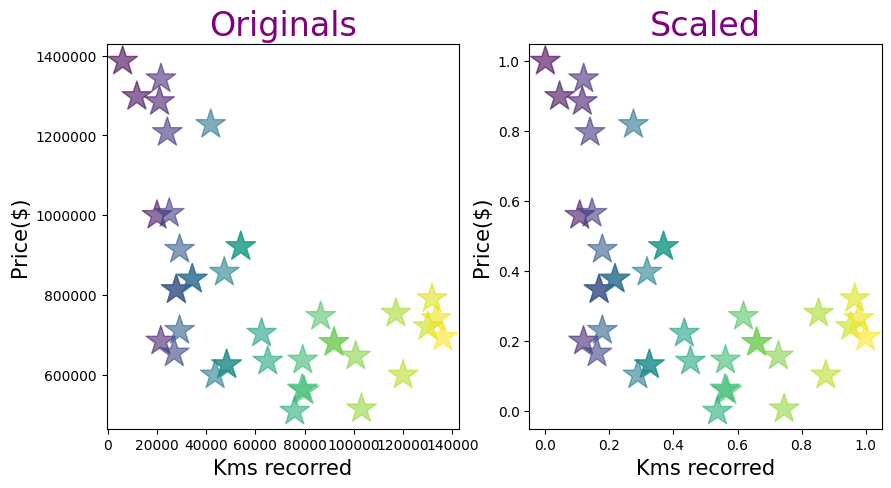

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

#load data
cars = pd.read_csv("carros.csv")

#fraphic raw data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)

ax.scatter(cars["kms"], cars["precio"], marker="*",
           s=500, c=range(cars["kms"].size), alpha=0.6)

ax.set_title("Originals", size=24, color="purple")
ax.set_ylabel("Price($)", size=15)
ax.set_xlabel("Kms recorred", size=15)
ax.ticklabel_format(style="plain")

#scale of data
scale_kms = preprocessing.MinMaxScaler()
scale_price = preprocessing.MinMaxScaler()
kms = scale_kms.fit_transform(cars["kms"].values.reshape(-1,1))
price = scale_price.fit_transform(cars["precio"].values.reshape(-1,1))

#graphic scaled data
ax = fig.add_subplot(1,2,2)

ax.scatter(kms, price, marker="*",
           s=500, c=range(cars["kms"].size), alpha=0.6)

ax.set_title("Scaled", size=24, color="purple")
ax.set_ylabel("Price($)", size=15)
ax.set_xlabel("Kms recorred", size=15)
ax.ticklabel_format(style="plain")

plt.show()

In [30]:
#cration of KNN model (regression)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(kms, price)

kms_instance = scale_kms.transform([[20000]])
price_instance = knn.predict(kms_instance)
scale_price.inverse_transform(price_instance)

array([[990048.]])

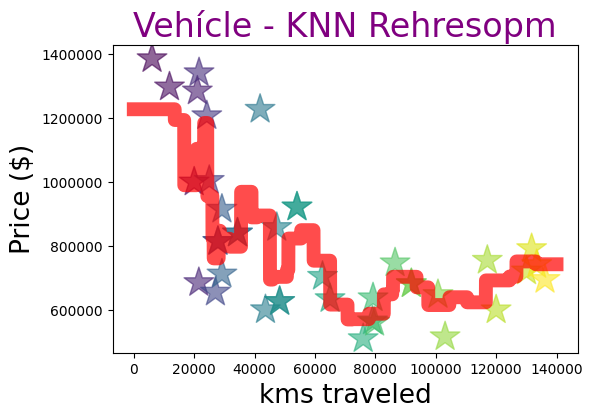

In [31]:
kms_instances = scale_kms.transform(np.arange(140_000).reshape(-1,1))
price_instances = knn.predict(kms_instances)
all = scale_price.inverse_transform(price_instances)
all = all.reshape(1, -1)

#graphic results in multiple regresions
fig = plt.figure(figsize=(6,4))
plt.plot(np.arange(140_000), all.reshape(1,-1)[0],
         linewidth=10, color="red", alpha=0.7)

plt.scatter(cars["kms"], cars["precio"], marker="*",
            s=500, c=range(cars["kms"].size), alpha = 0.6)

plt.title("Vehícle - KNN Rehresopm", size = 24, color="purple")
plt.ylabel("Price ($)", size=19)
plt.xlabel("kms traveled", size = 19)
plt.ticklabel_format(style = "plain")